# Calculating the Accuracy of the Model

All features into the regression. 

Moreover, the accuracy of the model w/ a confusion matrix

## Import the relevant libraries

In [45]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

## Load the data

In [46]:
df = pd.read_csv("Bank-data.csv")

In [47]:
df.describe(include="all")

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
count,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259
mean,258.500000,2.835776,0.034749,0.266409,0.388031,0.127413,382.177606,NaN
std,149.677988,1.876903,0.183321,0.442508,0.814527,0.333758,344.295990,NaN
min,0.000000,0.635000,0.000000,0.000000,0.000000,0.000000,9.000000,NaN
25%,129.250000,1.042750,0.000000,0.000000,0.000000,0.000000,155.000000,NaN
50%,258.500000,1.466000,0.000000,0.000000,0.000000,0.000000,266.500000,NaN
75%,387.750000,4.956500,0.000000,1.000000,0.000000,0.000000,482.750000,NaN


### Declare the dependent and independent variables

'duration' as the independet variable.

In [48]:
df = df.drop(["Unnamed: 0"], axis=1)

In [49]:
df['y'] = df['y'].map({'yes':1, 'no':0})

In [50]:
x1 = df["duration"]
y = df["y"]
df.describe(include="all")

,interest_rate,credit,march,may,previous,duration,y
count,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000
mean,2.835776,0.034749,0.266409,0.388031,0.127413,382.177606,0.500000
std,1.876903,0.183321,0.442508,0.814527,0.333758,344.295990,0.500483
min,0.635000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000
25%,1.042750,0.000000,0.000000,0.000000,0.000000,155.000000,0.000000
50%,1.466000,0.000000,0.000000,0.000000,0.000000,266.500000,0.500000
75%,4.956500,0.000000,1.000000,0.000000,0.000000,482.750000,1.000000
max,4.970000,1.000000,1.000000,5.000000,1.000000,2653.000000,1.000000


### Simple Logistic Regression

In [56]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()
# Get the regression summary
print(results_log.summary())

Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      516
Method:                           MLE   Df Model:                            1
Date:                Wed, 23 Sep 2020   Pseudo R-squ.:                  0.2121
Time:                        10:41:57   Log-Likelihood:                -282.89
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 5.387e-35
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7001      0.192     -8.863      0.000      -2.076      -1.324
duration       0.0051      0.

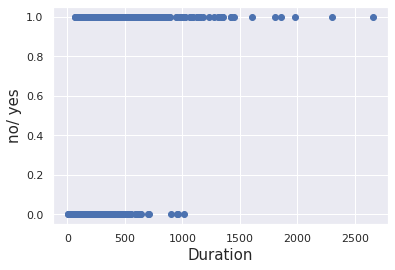

In [61]:
plt.scatter(x1,y)
plt.xlabel("Duration", fontsize=15)
plt.ylabel("no/ yes", fontsize=15)
plt.show()

## Expand the model

The ‘interest_rate’, ‘march’, ‘credit’ and ‘previous’ estimators to the model.

### Declare the independent variable(s)

In [70]:
estimators = df[["interest_rate","march","credit","previous","duration"]]
estimators

,interest_rate,march,credit,previous,duration
0,1.334,1.0,0.0,0.0,117.0
1,0.767,0.0,0.0,1.0,274.0
2,4.858,1.0,0.0,0.0,167.0
3,4.120,0.0,0.0,0.0,686.0
4,4.856,1.0,0.0,0.0,157.0
...,...,...,...,...,...
513,1.334,1.0,0.0,0.0,204.0
514,0.861,0.0,0.0,1.0,806.0
515,0.879,0.0,0.0,0.0,290.0
516,0.877,0.0,0.0,1.0,473.0


In [71]:
x = sm.add_constant(estimators)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()
# Get the regression summary
print(results_log.summary())

Optimization terminated successfully.
         Current function value: 0.336664
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      512
Method:                           MLE   Df Model:                            5
Date:                Wed, 23 Sep 2020   Pseudo R-squ.:                  0.5143
Time:                        10:51:30   Log-Likelihood:                -174.39
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 1.211e-77
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0211      0.311     -0.068      0.946      -0.631       0.589
interest_rate    -0.

### Confusion Matrix

In [65]:
def confusion_matrix(data,actual_values,model):
        
        # Confusion matrix 
        
        # Parameters
        # ----------
        # data: data frame or array
            # data is a data frame formatted in the same way as your input data (without the actual values)
            # e.g. const, var1, var2, etc. Order is very important!
        # actual_values: data frame or array
            # These are the actual values from the test_data
            # In the case of a logistic regression, it should be a single column with 0s and 1s
            
        # model: a LogitResults object
            # this is the variable where you have the fitted model 
            # e.g. results_log in this course
        # ----------
        
        #Predict the values using the Logit model
        pred_values = model.predict(data)
        # Specify the bins 
        bins=np.array([0,0.5,1])
        # Create a histogram, where if values are between 0 and 0.5 tell will be considered 0
        # if they are between 0.5 and 1, they will be considered 1
        cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
        # Calculate the accuracy
        accuracy = (cm[0,0]+cm[1,1])/cm.sum()
        # Return the confusion matrix and 
        return cm, accuracy

In [69]:
print(confusion_matrix(x,y,results_log))

(array([[218.,  41.],
       [ 30., 229.]]), 0.862934362934363)
